In [1]:
import pandas, numpy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# user-defined variables

In [3]:
input_file = 'Seahorse_on_HLMVEC_Dec_2nd.xlsx'


# read information

In [4]:
df = pandas.read_excel(input_file, sheet_name='Rate')
df

,Measurement,Well,Group,Time,OCR,ECAR,PER
0,1,A01,Background,1.309773,0.0,0.0,0
1,1,A02,Background,1.309773,0.0,0.0,0
2,1,A03,Background,1.309773,0.0,0.0,0
3,1,A04,Background,1.309773,0.0,0.0,0
4,1,A05,Background,1.309773,0.0,0.0,0
...,...,...,...,...,...,...,...
1435,15,H08,Background,91.908998,0.0,0.0,0
1436,15,H09,Background,91.908998,0.0,0.0,0
1437,15,H10,Background,91.908998,0.0,0.0,0
1438,15,H11,Background,91.908998,0.0,0.0,0


# work with ocr at four hours

In [5]:
df['Group'].unique()

array(['Background', 'Control', '24 HRS - Adreanline:Noradrenaline 5 uM',
       '24 HRS - Adreanline:Noradrenaline 0.5 uM', '24 HRS - Tnfa',
       '4 HRS - Adreanline:Noradrenaline 5 uM',
       '4 HRS - Adreanline:Noradrenaline 0.5 uM', '4 HRS - Tnfa'],
      dtype=object)

Control
	 before normalization


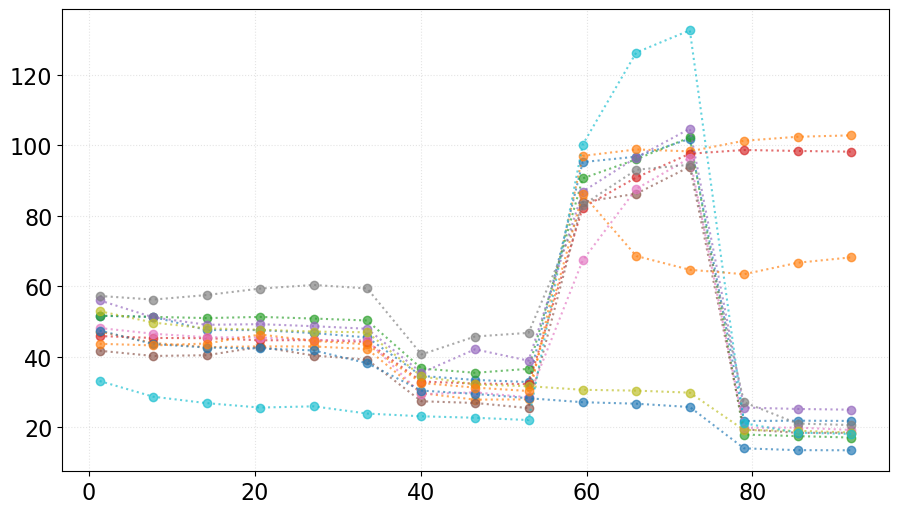

	 after excluding technical failures


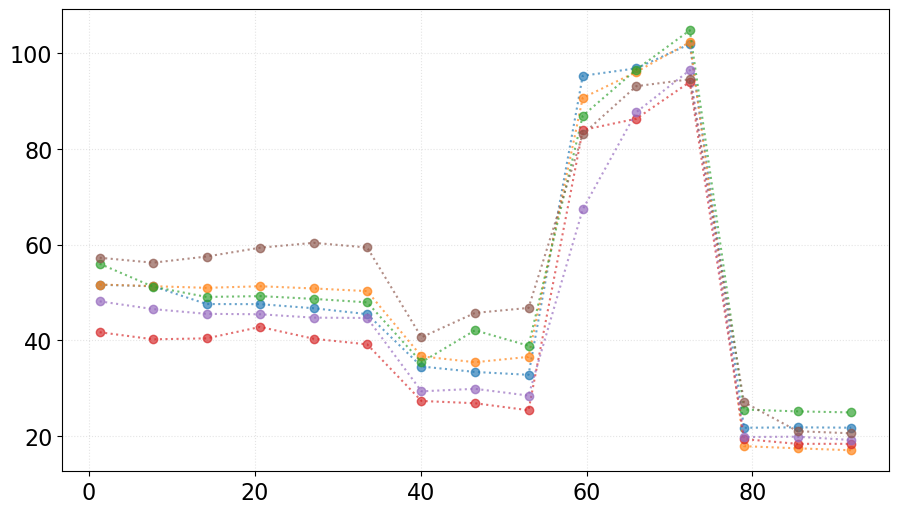

B02    1.016296
C02    1.024606
D02    1.059785
D11    0.873264
E02    0.911857
E11    1.114192
dtype: float64
	 after normalization


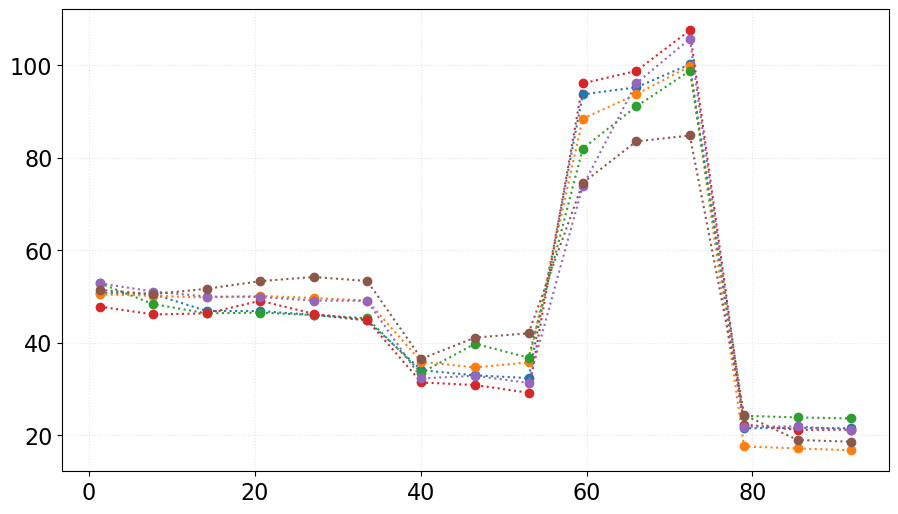

4 HRS - Adreanline:Noradrenaline 0.5 uM
	 before normalization


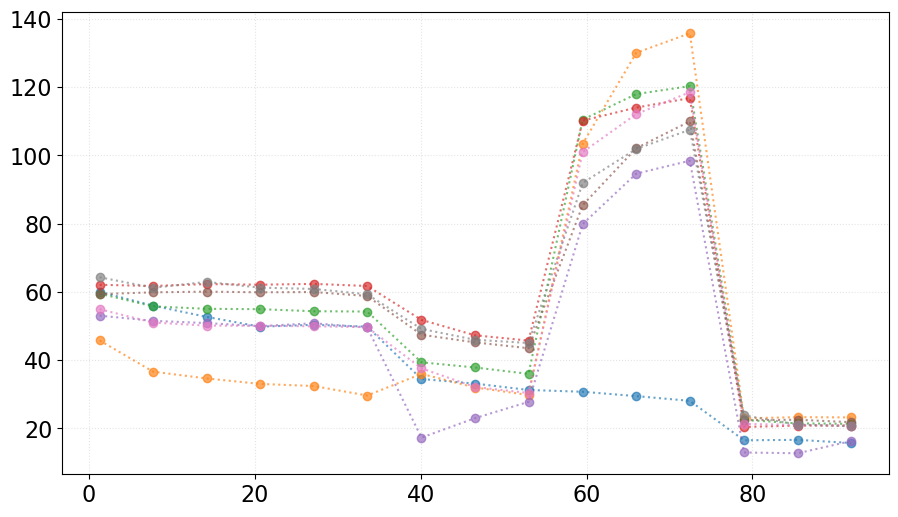

	 after excluding technical failures


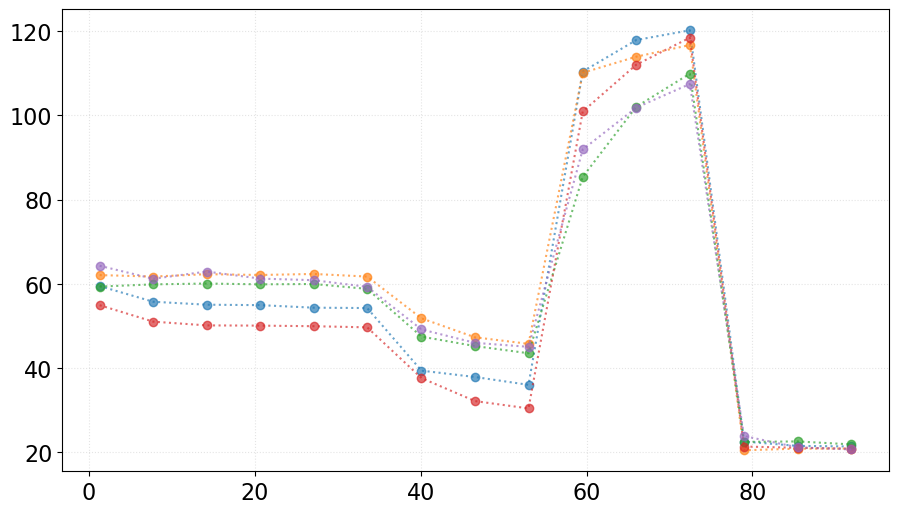

F05    0.997238
F06    1.065720
F08    0.994196
F09    0.927224
F10    1.015622
dtype: float64
	 after normalization


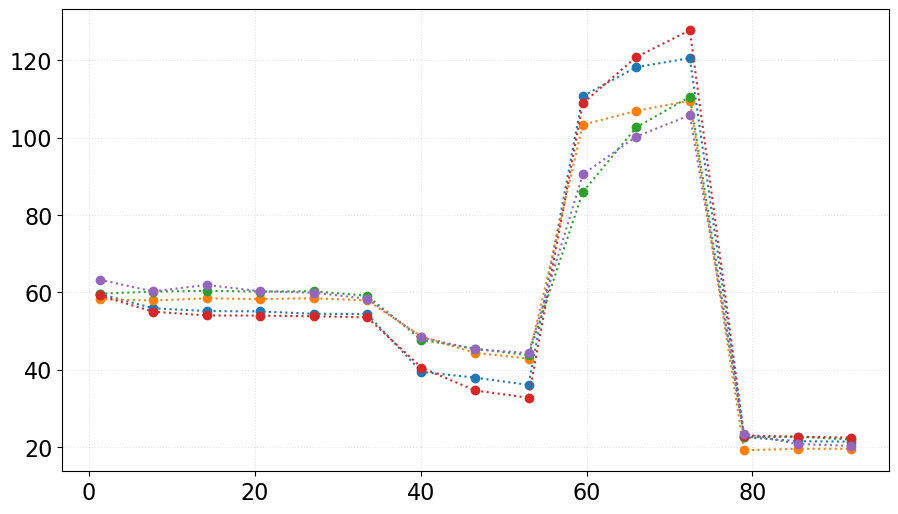

4 HRS - Adreanline:Noradrenaline 5 uM
	 before normalization


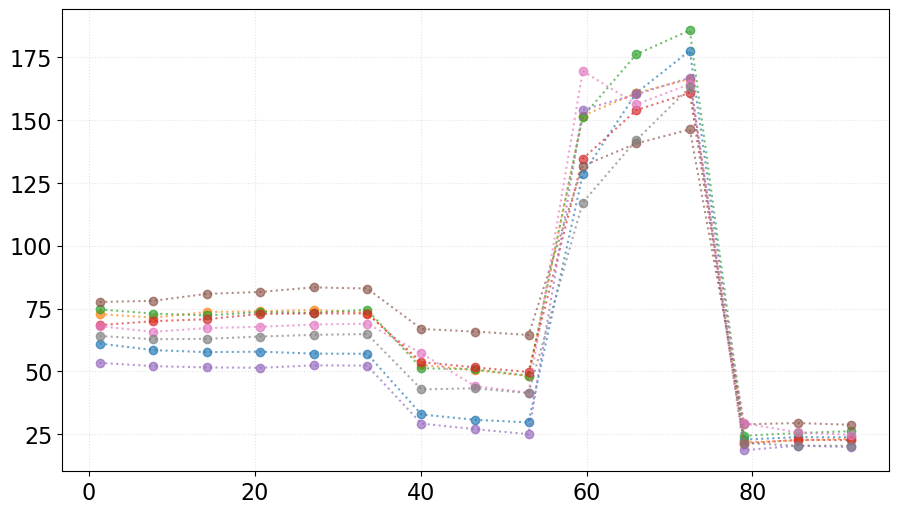

	 after excluding technical failures


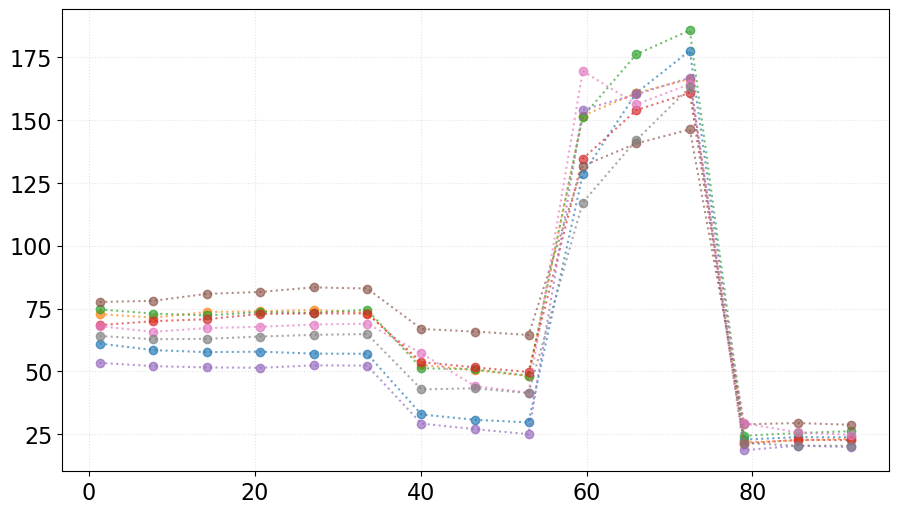

E03    0.907808
E04    1.053753
E05    1.094270
E06    1.018633
E07    0.866029
E08    1.100449
E09    1.036948
E10    0.922110
dtype: float64
	 after normalization


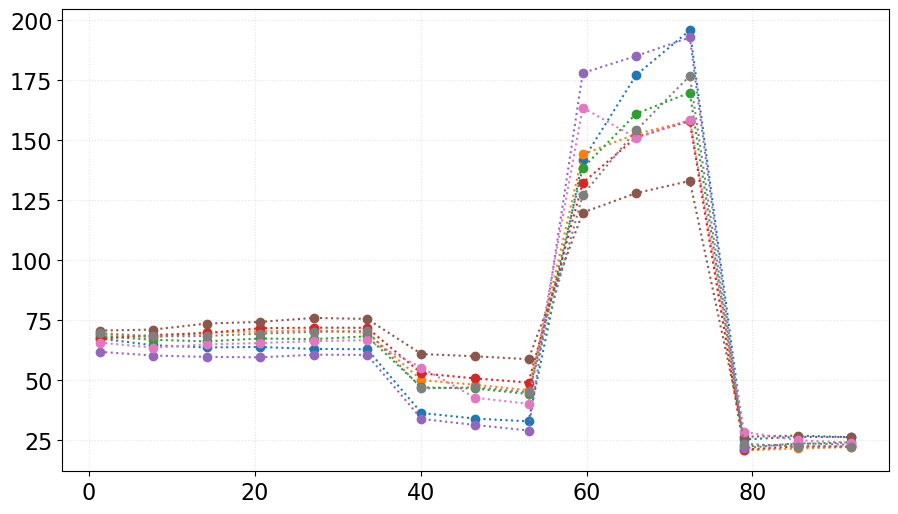

In [6]:
working_groups = ['Control', '4 HRS - Adreanline:Noradrenaline 0.5 uM', '4 HRS - Adreanline:Noradrenaline 5 uM']

excluded_wells = {}
excluded_wells['Control'] = ['F11', 'B11', 'C11', 'G11', 'F02', 'G02']
excluded_wells['4 HRS - Adreanline:Noradrenaline 0.5 uM'] = ['F03', 'F07', 'F04']
excluded_wells['4 HRS - Adreanline:Noradrenaline 5 uM'] = []

treated_trajectories = {}

for condition in working_groups:
    
    print(condition)
    sub = df[df['Group'] == condition]

    # generate dataframe for this trajectory
    dff = pandas.DataFrame()
    wells = sub['Well'].unique()
    for well in wells:
        trajectory = sub[sub['Well'] == well][['Time', 'OCR']]
        trajectory.set_index('Time', inplace=True)
        trajectory.rename(columns={'OCR': well}, inplace=True)
        dff[well] = trajectory[well]

    # plot original data
    print('\t before normalization')
    matplotlib.pyplot.plot(dff.index, dff, 'o:', alpha=2/3)
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # exclude samples that failed technically
    dff.drop(excluded_wells[condition], axis='columns', inplace=True)

    # plot after excluding technical failures
    print('\t after excluding technical failures')
    matplotlib.pyplot.plot(dff.index, dff, 'o:', alpha=2/3)
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # normalization
    relative_mu = dff.mean()/dff.mean().mean()
    print(relative_mu)
    normalized = dff/relative_mu

    # plot after normalization
    print('\t after normalization')
    matplotlib.pyplot.plot(dff.index, normalized, 'o:')
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # adding the treated data into container
    treated_trajectories[condition] = normalized

In [7]:
# genarate final figure

palette = ['black', 'tab:orage', 'tab:red']
my_labels = ['control', 'a', 'b']


for i in range(len(working_groups)):

    condition = working_groups[i]
    df = treated_trajectories[condition]

    mean = df.mean(axis=1)
    std = df.std(axis=1)
    matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color=palette[i], alpha=1/2)
    matplotlib.pyplot.plot(timepoints, mean, 'o', color=palette[i], ms=12, label='control', zorder=999)

mean = normalized_green.mean(axis=1)
std = normalized_green.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=12, label='0.5 uM', zorder=999)

mean = normalized_orange.mean(axis=1)
std = normalized_orange.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=12, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

matplotlib.pyplot.text(36, 500, 'Oligomycin', color='tab:blue')
matplotlib.pyplot.text(56, 500, 'FCCP', color='tab:blue')
matplotlib.pyplot.text(76, 500, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('pmol/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 520])
matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('seahorse.4h.svg')


NameError: name 'timepoints' is not defined

In [ ]:
sub[sub['Well'] == 'E03']

In [ ]:
trajectory

In [ ]:
dff = pandas.DataFrame()
wells = sub['Well'].unique()
for well in wells:
    print(well)
    trajectory = sub[sub['Well'] == well][['Time', 'OCR']]
    trajectory.set_index('Time', inplace=True)
    trajectory.rename(columns={'OCR': well}, inplace=True)
    dff[well]=trajectory[well]
dff

In [ ]:
matplotlib.pyplot.plot(dff.index, dff, 'o-')
matplotlib.pyplot.show()


In [ ]:
relative_mu = dff.mean()/dff.mean().mean()
print(relative_mu)
normalized_green = dff/relative_mu


In [ ]:
matplotlib.pyplot.plot(dff.index, normalized_green, 'o-')
matplotlib.pyplot.show()


In [ ]:
wells = sub['Well'].unique()

full = []
for well in wells:
    welldf = sub[sub['Well'] == well]
    time = welldf['Time']
    ocr = welldf['OCR']

    # plot
    matplotlib.pyplot.plot(time, ocr)

    # get values for normalization
    x = ocr.to_list()
    full.append(x)

matplotlib.pyplot.show()

# get values for normalization
matrix = numpy.array(full)
trajectories_means = matrix.mean(axis=1)
reference_value = trajectories_means.mean()
bias = trajectories_means / reference_value
correction = 1/bias

print(matrix)
print(trajectories_means)
print(reference_value)
print(bias)

normalized = (matrix.T * correction).T
print(normalized)

matplotlib.pyplot.plot(time, normalized.T)
matplotlib.pyplot.show()
